# Assignment 3: Kaggle Challenge

In [0]:
# import standard libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
# load train data
train_data = pd.read_csv('/train.csv')

In [0]:
# different classes
train_data.Category.unique()

array(['08_EMPTY', '01_TUMOR', '02_STROMA', '03_COMPLEX', '05_DEBRIS',
       '07_ADIPOSE', '06_MUCOSA', '04_LYMPHO'], dtype=object)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

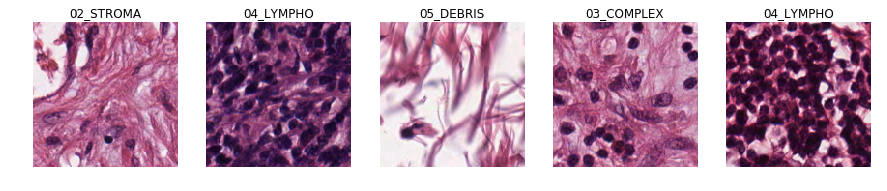

In [0]:
# reading images
from skimage.io import imread
import matplotlib.pyplot as plt

%matplotlib inline

train_data['train_file'] = train_data.Id.apply(lambda x: '/train/{0}'.format(x))


plt.figure(figsize=(15, 4))
for idx, (_, entry) in enumerate(train_data.sample(n=5).iterrows()):
    
    plt.subplot(1, 5, idx+1)
    plt.imshow(imread(entry.train_file))
    plt.axis('off')
    plt.title(entry.Category)

In [0]:
batch_size = 32
epochs = 120
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
dataset = pd.read_csv('/train.csv')
dataset

,Id,Category
0,0000.png,08_EMPTY
1,0001.png,01_TUMOR
2,0002.png,08_EMPTY
3,0003.png,02_STROMA
4,0004.png,08_EMPTY
...,...,...
4495,4495.png,08_EMPTY
4496,4496.png,08_EMPTY
4497,4497.png,06_MUCOSA
4498,4498.png,04_LYMPHO


In [0]:
train = dataset.iloc[:4000].reset_index()
train

,index,Id,Category
0,0,0000.png,08_EMPTY
1,1,0001.png,01_TUMOR
2,2,0002.png,08_EMPTY
3,3,0003.png,02_STROMA
4,4,0004.png,08_EMPTY
...,...,...,...
3995,3995,3995.png,08_EMPTY
3996,3996,3996.png,06_MUCOSA
3997,3997,3997.png,02_STROMA
3998,3998,3998.png,03_COMPLEX


In [0]:
val = dataset.iloc[4000:].reset_index()
val

,index,Id,Category
0,4000,4000.png,05_DEBRIS
1,4001,4001.png,05_DEBRIS
2,4002,4002.png,03_COMPLEX
3,4003,4003.png,08_EMPTY
4,4004,4004.png,03_COMPLEX
...,...,...,...
495,4495,4495.png,08_EMPTY
496,4496,4496.png,08_EMPTY
497,4497,4497.png,06_MUCOSA
498,4498,4498.png,04_LYMPHO


In [0]:
train_dir = '/train'
new_train_dir = './new_train'
new_val_dir = './new_val'

In [0]:
from shutil import copyfile

In [0]:
for row in train.iterrows():
    FOLDER_NAME = row[1]['Category']
    dirName = new_train_dir + '/' + FOLDER_NAME
    # Create target Directory if don't exist
    if not os.path.exists(dirName):
        os.makedirs(dirName)
    FILE_NAME = row[1]['Id']
    copyfile(train_dir +'/' + FILE_NAME, dirName + '/' + FILE_NAME)

In [0]:
for row in val.iterrows():
    FOLDER_NAME = row[1]['Category']
    dirName = new_val_dir + '/' + FOLDER_NAME
    # Create target Directory if don't exist
    if not os.path.exists(dirName):
        os.makedirs(dirName)
    FILE_NAME = row[1]['Id']
    copyfile(train_dir +'/' + FILE_NAME, dirName + '/' + FILE_NAME)

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=new_train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 4000 images belonging to 8 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=new_val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 500 images belonging to 8 classes.


In [0]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT,IMG_WIDTH,3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 2s 0us/step


In [0]:
vggmodel.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [0]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [0]:
X= vggmodel.layers[-2].output
X= keras.layers.Flatten()(X)
predictions = Dense(8, activation="softmax")(X)
model_final = Model(input = vggmodel.input,
                    output = predictions)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [0]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [0]:
total_train = len(train)
total_val = len(val)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
history = model_final.fit_generator(generator= train_data_gen, steps_per_epoch= total_train//batch_size, epochs=120, validation_data= val_data_gen, validation_steps=total_val//batch_size, callbacks=[checkpoint,early])
model_final.save_weights("vgg16_1.h5")

Epoch 1/120
125/125 [==============================] - 12s 97ms/step - loss: 1.3862 - accuracy: 0.5425 - val_loss: 1.0008 - val_accuracy: 0.7708
Epoch 2/120
  3/125 [..............................] - ETA: 5s - loss: 0.8666 - accuracy: 0.7708

/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


125/125 [==============================] - 8s 67ms/step - loss: 0.8508 - accuracy: 0.7508 - val_loss: 0.6248 - val_accuracy: 0.7863
Epoch 3/120
125/125 [==============================] - 9s 70ms/step - loss: 0.7250 - accuracy: 0.7785 - val_loss: 0.6758 - val_accuracy: 0.8120
Epoch 4/120
125/125 [==============================] - 8s 66ms/step - loss: 0.6469 - accuracy: 0.7997 - val_loss: 0.4636 - val_accuracy: 0.8291
Epoch 5/120
125/125 [==============================] - 8s 65ms/step - loss: 0.6080 - accuracy: 0.8105 - val_loss: 0.7026 - val_accuracy: 0.8355
Epoch 6/120
125/125 [==============================] - 8s 64ms/step - loss: 0.5688 - accuracy: 0.8160 - val_loss: 0.6649 - val_accuracy: 0.8248
Epoch 7/120
125/125 [==============================] - 8s 63ms/step - loss: 0.5414 - accuracy: 0.8263 - val_loss: 0.2992 - val_accuracy: 0.8611
Epoch 8/120
125/125 [==============================] - 8s 65ms/step - loss: 0.5161 - accuracy: 0.8300 - val_loss: 0.5858 - val_accuracy: 0.8462
Epoc

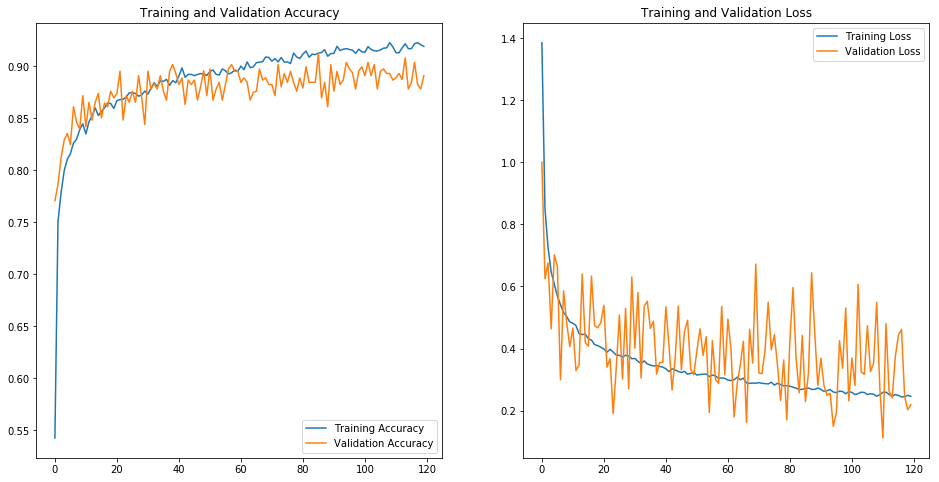

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
class_indices_dict = train_data_gen.class_indices
indices_class_dict = {v: k for k, v in class_indices_dict.items()}
indices_class_dict

{0: '01_TUMOR',
 1: '02_STROMA',
 2: '03_COMPLEX',
 3: '04_LYMPHO',
 4: '05_DEBRIS',
 5: '06_MUCOSA',
 6: '07_ADIPOSE',
 7: '08_EMPTY'}

In [0]:
print(acc)

[0.5425, 0.75075, 0.7785, 0.79975, 0.8105, 0.816, 0.82625, 0.83, 0.839, 0.84475, 0.835, 0.84675, 0.85225, 0.86, 0.85275, 0.8565, 0.86, 0.86475, 0.86425, 0.8595, 0.867, 0.868, 0.86825, 0.8705, 0.8745, 0.8745, 0.874, 0.87125, 0.8725, 0.87625, 0.87325, 0.87875, 0.88425, 0.8805, 0.88625, 0.8855, 0.8875, 0.88175, 0.88625, 0.88425, 0.89075, 0.8985, 0.8895, 0.89225, 0.89225, 0.891, 0.89225, 0.893, 0.8925, 0.89125, 0.895, 0.8965, 0.89225, 0.89175, 0.8975, 0.89575, 0.89275, 0.89375, 0.8965, 0.89525, 0.90025, 0.89675, 0.90425, 0.89875, 0.8995, 0.9035, 0.904, 0.9045, 0.909, 0.9085, 0.905, 0.9075, 0.90425, 0.9085, 0.904, 0.90425, 0.90275, 0.91275, 0.909, 0.9075, 0.91175, 0.91475, 0.90875, 0.91175, 0.91125, 0.91275, 0.91325, 0.916, 0.90975, 0.91225, 0.9125, 0.91925, 0.91525, 0.9165, 0.917, 0.91625, 0.9155, 0.9125, 0.9165, 0.914, 0.9135, 0.919, 0.91625, 0.915, 0.91475, 0.91575, 0.9175, 0.91775, 0.92275, 0.91875, 0.91325, 0.913, 0.91775, 0.92175, 0.917, 0.917, 0.92175, 0.92275, 0.92075, 0.91925]


In [0]:
# preparing the submission

import glob
import os

y_pred = []
test_img_names = []
test_files = glob.glob('/test/*.png')

for test_file in test_files:
    img = np.expand_dims(imread(test_file), axis=0)
    y_pred.append(indices_class_dict[np.argmax(model_final.predict(img/255.))])
    test_img_names.append(test_file.split('/')[-1])

sample_submission_1 = pd.DataFrame(list(zip(test_img_names,y_pred)),columns=['Id','Category'])

sample_submission_1.to_csv('results.csv', index=False)